<a href="https://colab.research.google.com/github/Sakshi3071/Spark_Foundation_Internship_Tasks/blob/main/The_Spark_Foundation_Internship_Task_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

****Linear Regression with Python Scikit Learn****

---



---



In [128]:
#Importing Necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

In [62]:
#Reading data from link
url = "http://bit.ly/w-data"
student_data = pd.read_csv(url)
student_data = pd.DataFrame(data = student_data)
print("Data has been imported.")

Data has been imported.


In [63]:
student_data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [64]:
student_data.shape

(25, 2)

In [65]:
student_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


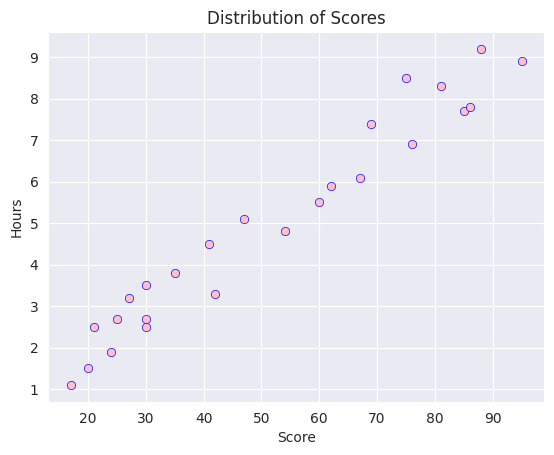

In [86]:
# Plotting the distribution of hours and scores
sns.scatterplot(x = student_data['Scores'],y = student_data['Hours'], edgecolor='blue',color = 'pink')
plt.xlabel('Score')
plt.ylabel('Hours')
sns.set_style('dark')
plt.title('Distribution of Scores')
plt.show()


**From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and score of students obtained**

**Data Preprocessing**

---



---


The next step is to divide the data into "X" (inputs) and "y" (outputs).

In [100]:
X = student_data.iloc[:, 0].values
y = student_data.iloc[:, 1].values

In [110]:
# Reshape the input data
X = student_data['Scores'].values.reshape((-1, 1))
# Reshape the target data
y = student_data['Hours'].values.reshape((-1, 1))

In [111]:
X_train,X_test, y_train , y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)

In [112]:
print('X_train shape:',X_train.shape)
print('X_test shape:',X_test.shape)
print('y_train shape:',y_train.shape)
print('y_test shape:',y_test.shape)

X_train shape: (20, 1)
X_test shape: (5, 1)
y_train shape: (20, 1)
y_test shape: (5, 1)


In [113]:
y_test,X_test

(array([[8.3],
        [2.5],
        [2.5],
        [6.9],
        [5.9]]),
 array([[81],
        [30],
        [21],
        [76],
        [62]]))

**Training the Algorithm**

---



---




In [114]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [115]:
lr.fit(X_train , y_train)

LinearRegression()

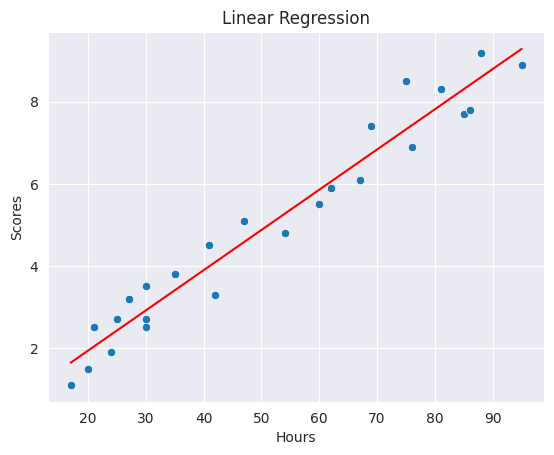

In [117]:
# Plotting the regression line
# Plotting the data points and the regression line
sns.scatterplot(x=X.flatten(), y=y.flatten())
sns.lineplot(x=X.flatten(), y=lr.predict(X).flatten(), color='red')

plt.xlabel('Hours')
plt.ylabel('Scores')
plt.title('Linear Regression')
sns.set_style("darkgrid")

plt.show()

**Making Predictions**

---



---



In [118]:
# Testing data - In Hours
y_pred = lr.predict(X_test)

In [119]:
print(y_pred)

[[7.91556345]
 [2.91610289]
 [2.03384515]
 [7.42542025]
 [6.05301932]]


In [123]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df

,Actual,Predicted
0,8.3,7.915563
1,2.5,2.916103
2,2.5,2.033845
3,6.9,7.425420
4,5.9,6.053019


In [125]:
hours = 9.25
own_pred = lr.predict(np.array(hours).reshape(1, -1))
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = [0.88200865]


**Evaluating the mode**

---



---



In [127]:
# Calculate R-squared score
r2_score = lr.score(X_test, y_test)
print("R-squared score: {:.2f}".format(r2_score))


R-squared score: 0.97


In [126]:
from sklearn import metrics
print('Mean Absolute Error:',
      metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error: 0.38902677412441233




---



---



---

